In [1]:
import math
import scipy
import warnings
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn import preprocessing, linear_model
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.3f}'.format

In [2]:
ny_crime_2013 = pd.read_csv('offenses.csv', header=4, skipfooter=3)
ny_crime_2013.columns = ['city', 'population', 'violent crime', 'murder', 'rape(new def)', 'rape(old def)', 'robbery','aggrevated assault', 'property crime', 'burglary', 'larceny', 'motor theft', 'arson']
df = ny_crime_2013

df = df.drop(columns=['city'])
#drop non-null column + non-null cells row
df = df.drop(labels='rape(new def)', axis=1).dropna().replace(',','', regex=True).astype(float)
crime = df['property crime'].astype(float)
df = df.drop(columns=['property crime'])

count   187.000
mean      8.751
std       1.273
min       6.265
25%       7.694
50%       8.778
75%       9.687
max      12.258
Name: population_lg, dtype: float64

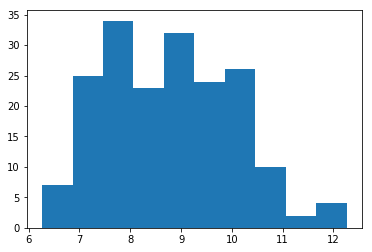

In [3]:
#feature engineering
df['population_lg'] = np.log(df['population'])
plt.hist(df['population_lg'])
df['population_lg'].describe()

In [4]:
#feature engineering
df['murder'] = np.where(df['murder'] > 0, 1, 0)
df['robbery'] = np.where(df['robbery'] > 0, 1, 0)

(array([10., 32., 20., 24., 28., 21., 23., 21.,  5.,  3.]),
 array([0.        , 0.45641736, 0.91283472, 1.36925208, 1.82566944,
        2.2820868 , 2.73850416, 3.19492152, 3.65133888, 4.10775624,
        4.5641736 ]),
 <a list of 10 Patch objects>)

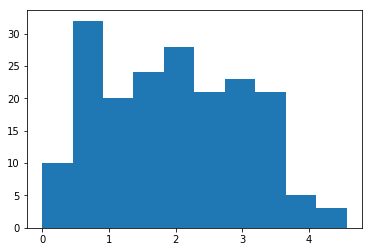

In [5]:
#feature engineering testing
df["burglarybxcx"] = [x if x > 0 else 2 for x in df["burglary"]]
xt, _ = stats.boxcox(df['burglarybxcx'])
plt.hist(xt)

(array([13.,  9., 29., 33., 31., 30., 22., 13.,  5.,  2.]),
 array([ 0.        ,  1.02596083,  2.05192167,  3.0778825 ,  4.10384333,
         5.12980416,  6.155765  ,  7.18172583,  8.20768666,  9.23364749,
        10.25960833]),
 <a list of 10 Patch objects>)

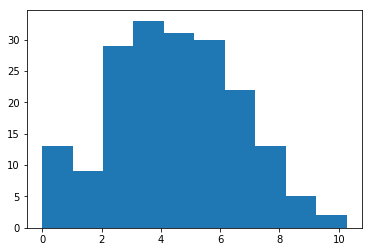

In [6]:
#more testing
df["larcenytheftbxcx"] = [x if x > 0 else 1 for x in df["larceny"]]
xt, _ = stats.boxcox(df['larcenytheftbxcx'])
plt.hist(xt)

In [7]:
x = df[['murder', 'population', 'robbery']].values
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [8]:
regr = linear_model.LinearRegression()
Y = crime.values.reshape(-1, 1)
X = df
regr.fit(X, Y)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[  99.09697351 6454.46548678  -76.40855334]]

Intercept: 
 [-71.14262345]

R-squared:
0.7576739665411549


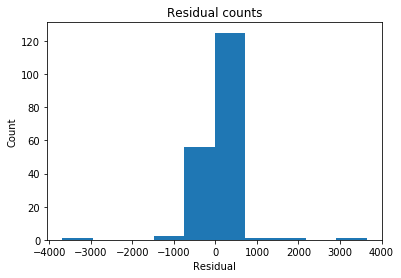

In [9]:
predicted = regr.predict(X).ravel()
actual = crime
residual = actual - predicted
predicted = predicted
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

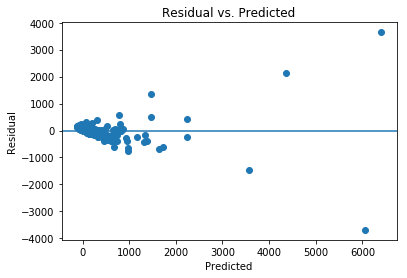

In [10]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [11]:
correlation_matrix = X.corr()
display(correlation_matrix)

,0,1,2
0,1.000,0.559,0.354
1,0.559,1.000,0.387
2,0.354,0.387,1.000
